<class 'pandas.core.frame.DataFrame'>
Index: 230736 entries, 230736 to 461471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      230736 non-null  datetime64[ns]
 1   y       230736 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23741 entries, 0 to 23740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      23741 non-null  datetime64[ns]
 1   y       23741 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 371.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      228 non-null    datetime64[ns]
 1   y       228 non-null    float64       
dtypes: datetime64[ns](1),

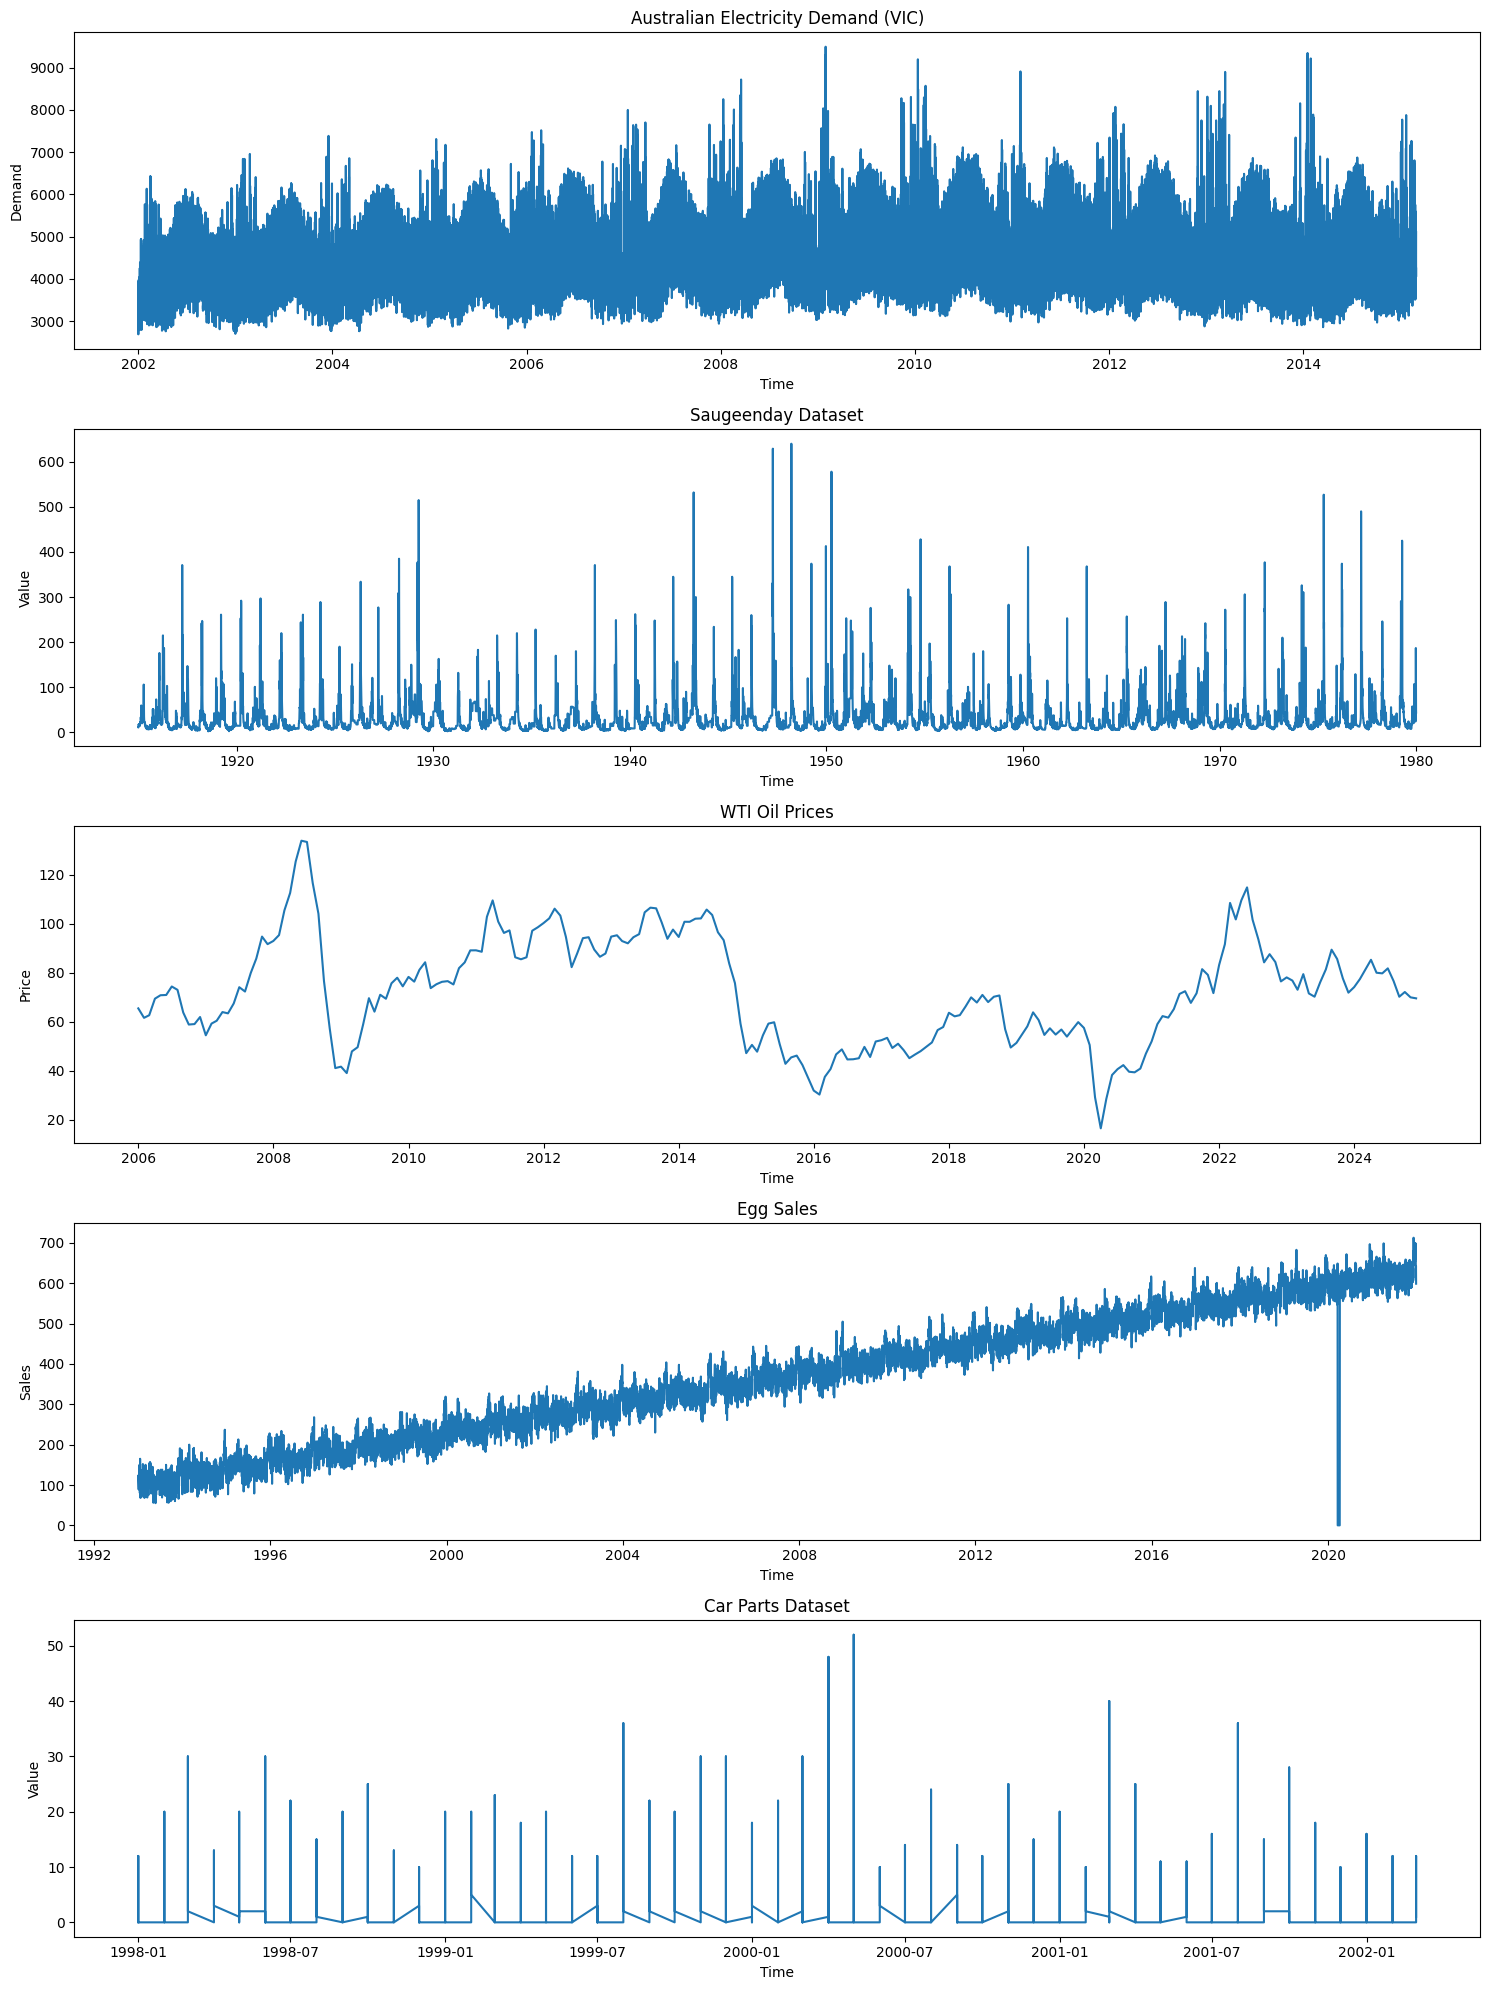

In [13]:
%run "datagetter.ipynb"


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False


## Loading datasets

In [15]:
australian_electricity_demand_df.head()

,ds,y
230736,2002-01-01 00:00:00,3535.867064
230737,2002-01-01 00:30:00,3383.499028
230738,2002-01-01 01:00:00,3655.527552
230739,2002-01-01 01:30:00,3510.446636
230740,2002-01-01 02:00:00,3294.697156


In [40]:
saugeen_river_df.head()

,ds,y
0,1915-01-01,11.5
1,1915-01-02,10.8
2,1915-01-03,13.7
3,1915-01-04,13.7
4,1915-01-05,14.4


In [38]:
wti_oil_df.head()

,ds,y
0,2006-01-01,65.485000
1,2006-02-01,61.631053
2,2006-03-01,62.685217
3,2006-04-01,69.443684
4,2006-05-01,70.844091


In [39]:
egg_sales_df.head()

,ds,y
0,1993-01-01,91
1,1993-01-02,124
2,1993-01-03,112
3,1993-01-04,115
4,1993-01-05,107


In [42]:
car_parts_df.tail()

,ds,y
88994,2002-03-01,0.0
88943,2002-03-01,1.0
88892,2002-03-01,0.0
89810,2002-03-01,0.0
136373,2002-03-01,1.0


- Plotting the data

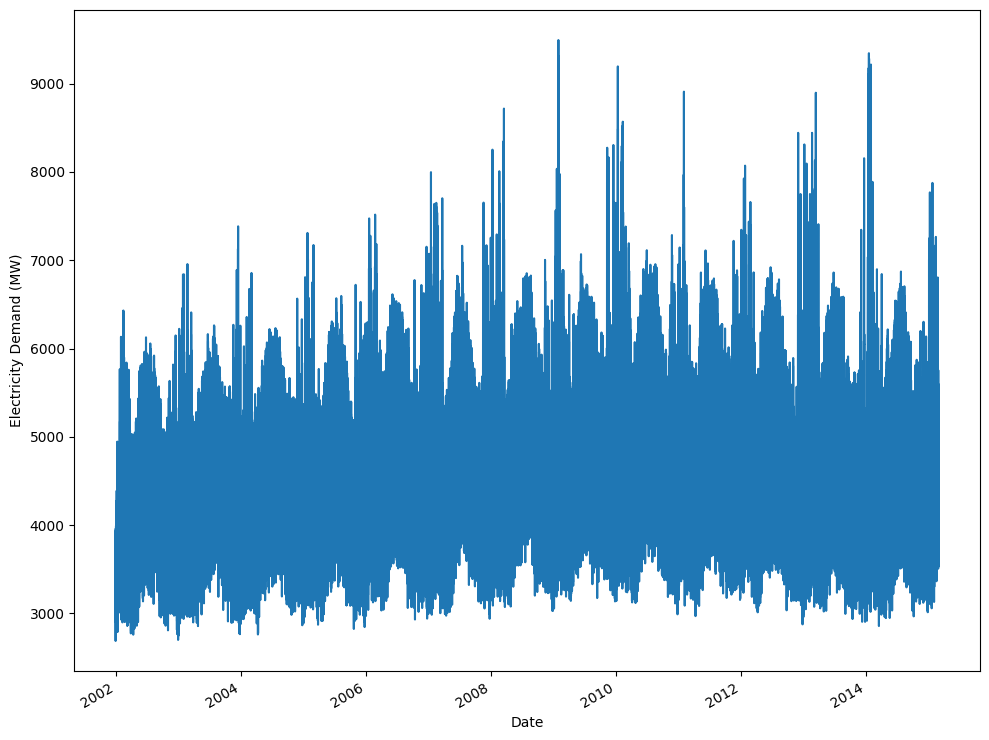

In [ ]:
fig, ax = plt.subplots()
ax.plot(australian_electricity_demand_df['ds'], australian_electricity_demand_df['y'])
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Demand (MW)')

fig.autofmt_xdate()
plt.tight_layout()


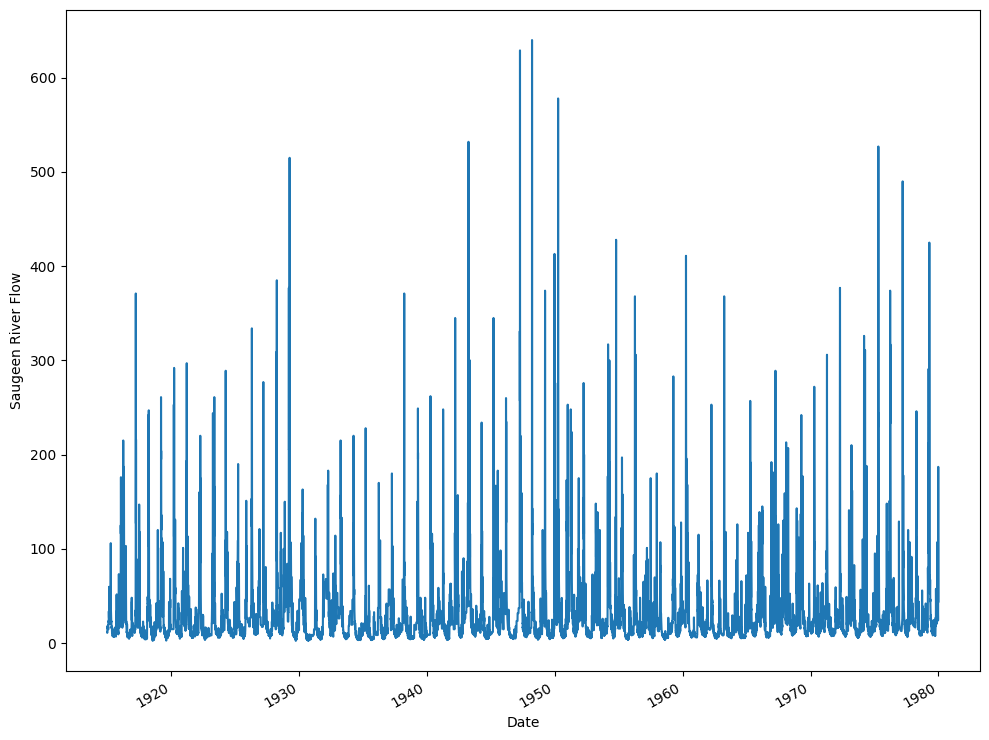

In [45]:
fig, ax = plt.subplots()
ax.plot(saugeen_river_df['ds'], saugeen_river_df['y'])
ax.set_xlabel('Date')
ax.set_ylabel('Saugeen River Flow')

fig.autofmt_xdate()
plt.tight_layout()

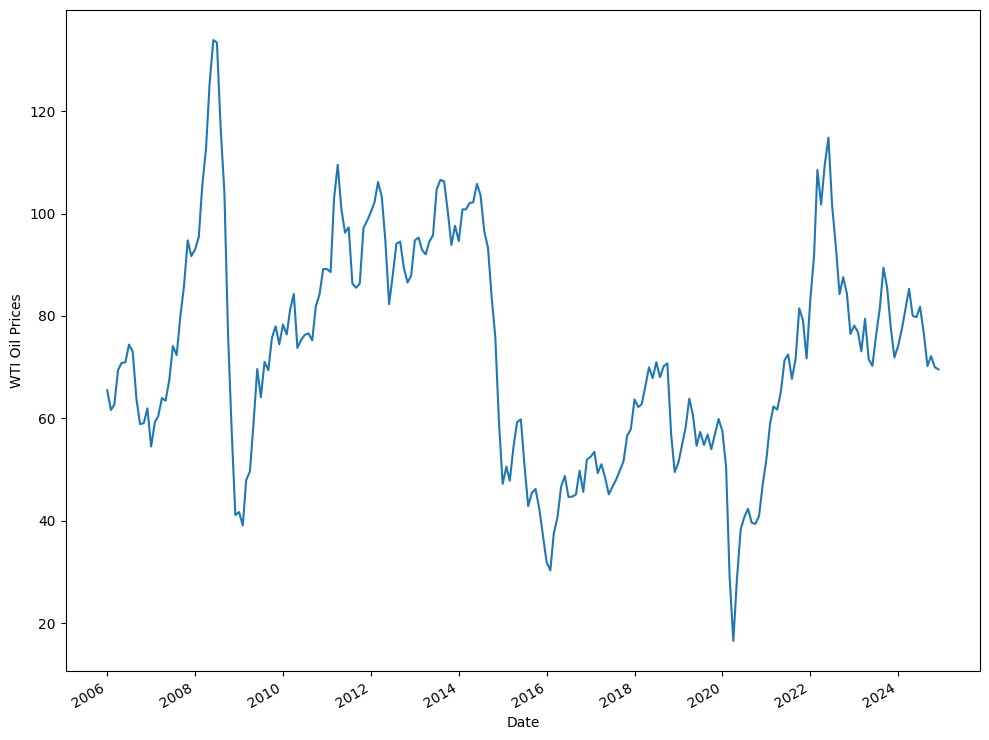

In [46]:
fig, ax = plt.subplots()
ax.plot(wti_oil_df['ds'], wti_oil_df['y'])
ax.set_xlabel('Date')
ax.set_ylabel('WTI Oil Prices')

fig.autofmt_xdate()
plt.tight_layout()

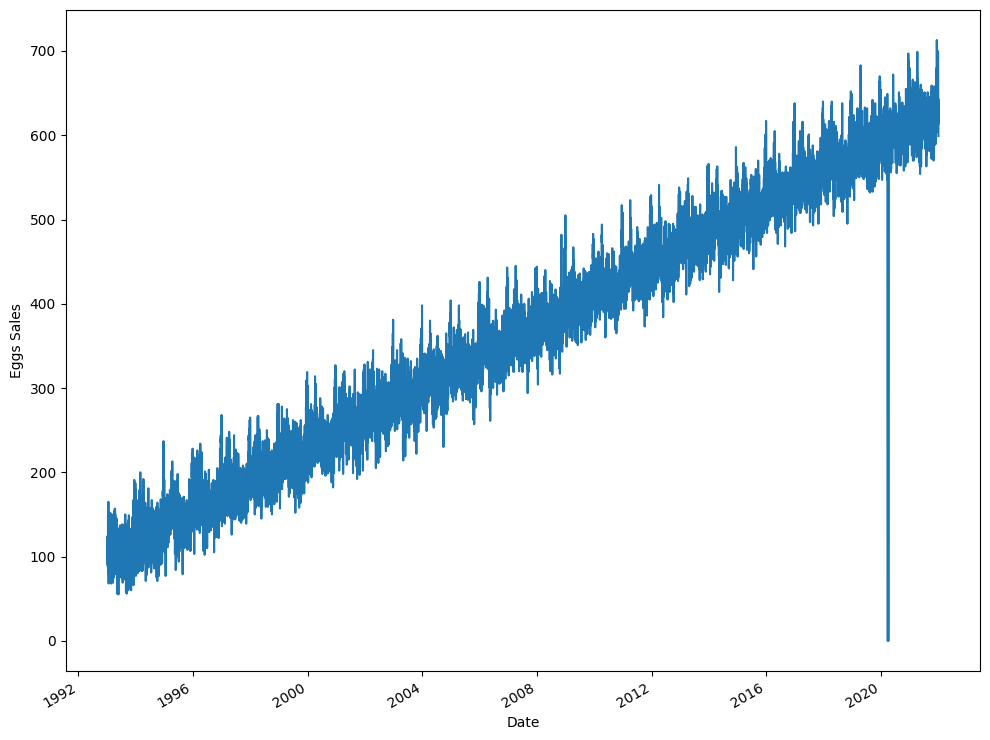

In [47]:
fig, ax = plt.subplots()
ax.plot(egg_sales_df['ds'], egg_sales_df['y'])
ax.set_xlabel('Date')
ax.set_ylabel('Eggs Sales')

fig.autofmt_xdate()
plt.tight_layout()

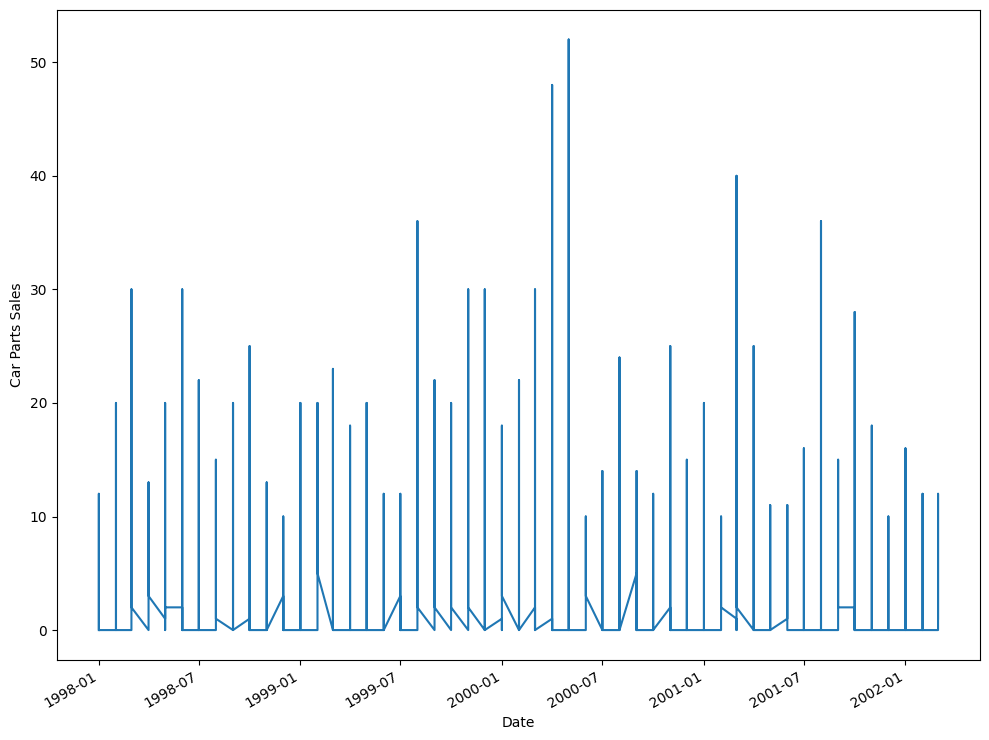

In [48]:
fig, ax = plt.subplots()
ax.plot(car_parts_df['ds'], car_parts_df['y'])
ax.set_xlabel('Date')
ax.set_ylabel('Car Parts Sales')

fig.autofmt_xdate()
plt.tight_layout()

- ensuring all are set to ds and y

In [160]:
# make sure ds and y defined for all datasets
australian_electricity_demand_df.columns = ['ds', 'y']
australian_electricity_demand_df.head()

,ds,y
230736,2002-01-01 00:00:00,3535.867064
230737,2002-01-01 00:30:00,3383.499028
230738,2002-01-01 01:00:00,3655.527552
230739,2002-01-01 01:30:00,3510.446636
230740,2002-01-01 02:00:00,3294.697156


In [170]:
saugeen_river_df.columns = ['ds', 'y']
saugeen_river_df.head()

,ds,y
0,1915-01-01,11.5
1,1915-01-02,10.8
2,1915-01-03,13.7
3,1915-01-04,13.7
4,1915-01-05,14.4


In [171]:
wti_oil_df.columns = ['ds', 'y']
wti_oil_df.head()

,ds,y
0,2006-01-01,65.485000
1,2006-02-01,61.631053
2,2006-03-01,62.685217
3,2006-04-01,69.443684
4,2006-05-01,70.844091


In [172]:
egg_sales_df.columns = ['ds', 'y']
egg_sales_df.head()

,ds,y
0,1993-01-01,91
1,1993-01-02,124
2,1993-01-03,112
3,1993-01-04,115
4,1993-01-05,107


In [173]:
car_parts_df.columns = ['ds', 'y']
car_parts_df.head()

,ds,y
0,1998-01-01,0.0
98124,1998-01-01,0.0
98175,1998-01-01,0.0
98226,1998-01-01,2.0
14790,1998-01-01,0.0


- Train/Test Split

In [174]:
# If daily data, 365 for one year
# Australian Electricity Demand

train_electricity = australian_electricity_demand_df[:-365]
test_electricity = australian_electricity_demand_df[-365:]

# Saugeen River
train_saugeen = saugeen_river_df[:-365]
test_saugeen = saugeen_river_df[-365:]

# WTI Oil Sales (Data set smaller than 365, i'll use 1/3 of the data)
n = len(wti_oil_df)
test_size = n // 3
train_size = n - test_size

train_wti = wti_oil_df[:train_size]   # First 152 rows
test_wti = wti_oil_df[train_size:]    # Last 76 rows

# Eggs Sales
train_egg_sales = egg_sales_df[:-365]
test_egg_sales = egg_sales_df[-365:]

# Car Parts Sales
train_car_parts = car_parts_df[:-365]
test_car_parts = car_parts_df[-365:]


- Train model prophet on all datasets

In [59]:
model_electricity_demand = Prophet()
model_electricity_demand.fit(train_electricity)

11:44:17 - cmdstanpy - INFO - Chain [1] start processing
11:46:35 - cmdstanpy - INFO - Chain [1] done processing


In [175]:
model_saugeen = Prophet()
model_saugeen.fit(train_saugeen)

12:53:35 - cmdstanpy - INFO - Chain [1] start processing
12:53:43 - cmdstanpy - INFO - Chain [1] done processing


In [176]:
model_wti_oil = Prophet()
model_wti_oil.fit(train_wti)

12:53:48 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing


In [177]:
model_egg_sales = Prophet()
model_egg_sales.fit(train_egg_sales)

12:53:51 - cmdstanpy - INFO - Chain [1] start processing
12:53:52 - cmdstanpy - INFO - Chain [1] done processing


In [178]:
model_car_parts = Prophet()
model_car_parts.fit(train_car_parts)

12:53:59 - cmdstanpy - INFO - Chain [1] start processing
12:54:11 - cmdstanpy - INFO - Chain [1] done processing


- Forecast

In [162]:
future_electricity_demand = model_electricity_demand.make_future_dataframe(periods=365)
forecast_electricity_demand = model_electricity_demand.predict(future_electricity_demand)
forecast_electricity_demand.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
230731,2016-02-17 09:00:00,4496.330836,4561.561796,5994.387031,4212.724475,4819.758987,770.762299,770.762299,770.762299,437.620315,...,229.887948,229.887948,229.887948,103.254035,103.254035,103.254035,0.0,0.0,0.0,5267.093135
230732,2016-02-18 09:00:00,4496.161360,4619.340380,5988.588738,4211.043452,4820.649433,801.949680,801.949680,801.949680,437.620315,...,262.183465,262.183465,262.183465,102.145899,102.145899,102.145899,0.0,0.0,0.0,5298.111039
230733,2016-02-19 09:00:00,4495.991884,4555.309561,5995.024186,4209.362430,4821.491415,746.709036,746.709036,746.709036,437.620315,...,208.532248,208.532248,208.532248,100.556473,100.556473,100.556473,0.0,0.0,0.0,5242.700919
230734,2016-02-20 09:00:00,4495.822408,4039.390941,5384.959934,4207.681407,4822.259542,224.904695,224.904695,224.904695,437.620315,...,-311.070905,-311.070905,-311.070905,98.355284,98.355284,98.355284,0.0,0.0,0.0,4720.727102
230735,2016-02-21 09:00:00,4495.652931,3715.381308,5056.869289,4206.000384,4823.065943,-114.077298,-114.077298,-114.077298,437.620315,...,-647.123735,-647.123735,-647.123735,95.426122,95.426122,95.426122,0.0,0.0,0.0,4381.575634


In [179]:
future_saugeen = model_saugeen.make_future_dataframe(periods=365)
forecast_saugeen = model_saugeen.predict(future_saugeen)
forecast_saugeen.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
23736,1979-12-27,32.310520,-10.293473,68.693970,32.133251,32.494000,-3.203977,-3.203977,-3.203977,-0.128114,-0.128114,-0.128114,-3.075863,-3.075863,-3.075863,0.0,0.0,0.0,29.106544
23737,1979-12-28,32.310737,-12.701514,70.066478,32.132181,32.498972,-3.219166,-3.219166,-3.219166,0.095739,0.095739,0.095739,-3.314905,-3.314905,-3.314905,0.0,0.0,0.0,29.091571
23738,1979-12-29,32.310954,-11.653902,67.694694,32.131111,32.500964,-3.307412,-3.307412,-3.307412,0.246266,0.246266,0.246266,-3.553678,-3.553678,-3.553678,0.0,0.0,0.0,29.003541
23739,1979-12-30,32.311171,-13.296372,69.020471,32.130041,32.502612,-3.689623,-3.689623,-3.689623,0.097089,0.097089,0.097089,-3.786711,-3.786711,-3.786711,0.0,0.0,0.0,28.621548
23740,1979-12-31,32.311387,-12.127122,67.468957,32.128971,32.505975,-4.014826,-4.014826,-4.014826,-0.006378,-0.006378,-0.006378,-4.008448,-4.008448,-4.008448,0.0,0.0,0.0,28.296562


In [180]:
future_wti_oil = model_wti_oil.make_future_dataframe(periods=122)
forecast_wti_oil = model_wti_oil.predict(future_wti_oil)
forecast_wti_oil.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
269,2018-11-27,46.721702,19.020405,65.289975,46.670699,46.766166,-3.810916,-3.810916,-3.810916,-3.810916,-3.810916,-3.810916,0.0,0.0,0.0,42.910785
270,2018-11-28,46.703785,19.937429,67.928158,46.652064,46.749205,-3.826527,-3.826527,-3.826527,-3.826527,-3.826527,-3.826527,0.0,0.0,0.0,42.877258
271,2018-11-29,46.685868,19.765709,67.210196,46.633673,46.731820,-3.919439,-3.919439,-3.919439,-3.919439,-3.919439,-3.919439,0.0,0.0,0.0,42.766429
272,2018-11-30,46.667951,19.593519,64.506405,46.615281,46.714345,-4.088125,-4.088125,-4.088125,-4.088125,-4.088125,-4.088125,0.0,0.0,0.0,42.579827
273,2018-12-01,46.650035,19.174041,66.621812,46.596591,46.696870,-4.328840,-4.328840,-4.328840,-4.328840,-4.328840,-4.328840,0.0,0.0,0.0,42.321195


In [181]:
future_egg_sales = model_egg_sales.make_future_dataframe(periods=365)
forecast_egg_sales = model_egg_sales.predict(future_egg_sales)
forecast_egg_sales.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10587,2021-12-27,613.825048,602.643221,688.880712,613.691881,613.963564,31.287182,31.287182,31.287182,0.526079,0.526079,0.526079,30.761103,30.761103,30.761103,0.0,0.0,0.0,645.112229
10588,2021-12-28,613.866384,597.665342,684.694851,613.732527,614.005407,27.560839,27.560839,27.560839,0.161371,0.161371,0.161371,27.399468,27.399468,27.399468,0.0,0.0,0.0,641.427223
10589,2021-12-29,613.907721,592.136772,676.707494,613.773172,614.047250,23.469899,23.469899,23.469899,-0.465489,-0.465489,-0.465489,23.935388,23.935388,23.935388,0.0,0.0,0.0,637.377620
10590,2021-12-30,613.949057,593.045861,675.465590,613.813875,614.089094,20.727297,20.727297,20.727297,0.295803,0.295803,0.295803,20.431494,20.431494,20.431494,0.0,0.0,0.0,634.676354
10591,2021-12-31,613.990394,591.121477,674.873667,613.854588,614.130937,16.949118,16.949118,16.949118,-0.000681,-0.000681,-0.000681,16.949799,16.949799,16.949799,0.0,0.0,0.0,630.939511


In [182]:
future_car_parts = model_car_parts.make_future_dataframe(periods=365)
forecast_car_parts = model_car_parts.predict(future_car_parts)
forecast_car_parts.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
411,2003-02-25,0.196239,-1.453899,1.722938,0.061031,0.335434,-0.149545,-0.149545,-0.149545,-0.149545,-0.149545,-0.149545,0.0,0.0,0.0,0.046694
412,2003-02-26,0.195856,-1.494822,1.706932,0.060312,0.336003,-0.113785,-0.113785,-0.113785,-0.113785,-0.113785,-0.113785,0.0,0.0,0.0,0.082072
413,2003-02-27,0.195474,-1.547345,1.630918,0.059593,0.336566,-0.075776,-0.075776,-0.075776,-0.075776,-0.075776,-0.075776,0.0,0.0,0.0,0.119698
414,2003-02-28,0.195091,-1.512204,1.872819,0.058873,0.336856,-0.036306,-0.036306,-0.036306,-0.036306,-0.036306,-0.036306,0.0,0.0,0.0,0.158785
415,2003-03-01,0.194709,-1.337200,1.803128,0.058080,0.336864,0.003792,0.003792,0.003792,0.003792,0.003792,0.003792,0.0,0.0,0.0,0.198501


- Forecast Table

In [183]:
forecast_electricity_demand[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]


,ds,yhat,yhat_lower,yhat_upper
230371,2015-02-22 09:00:00,4438.432606,3868.551519,5033.728159
230372,2015-02-23 09:00:00,5098.905707,4491.035315,5714.399979
230373,2015-02-24 09:00:00,5313.650139,4735.285145,5923.472525
230374,2015-02-25 09:00:00,5297.349850,4738.588484,5906.080125
230375,2015-02-26 09:00:00,5321.661070,4734.687986,5882.656114


In [184]:
forecast_saugeen[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
23376,1979-01-01,27.964733,-15.390276,70.527463
23377,1979-01-02,27.672090,-12.229640,66.364589
23378,1979-01-03,27.464432,-11.407927,68.851471
23379,1979-01-04,27.402286,-10.854380,65.773124
23380,1979-01-05,27.545960,-12.509099,67.119737


In [185]:
forecast_wti_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[train_size:train_size + test_size]



,ds,yhat,yhat_lower,yhat_upper
152,2018-08-02,52.333553,28.259886,76.724599
153,2018-08-03,52.814231,29.914291,76.926157
154,2018-08-04,53.198184,29.684879,75.503149
155,2018-08-05,53.476271,30.008010,76.862977
156,2018-08-06,53.642293,30.312292,76.368297
...,...,...,...,...
223,2018-10-12,49.816597,25.107949,73.795042
224,2018-10-13,50.355229,28.749529,73.236809
225,2018-10-14,50.855113,27.016075,74.328438
226,2018-10-15,51.299263,28.308361,75.821993


In [186]:
forecast_egg_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
10227,2021-01-01,611.663309,569.985529,651.688053
10228,2021-01-02,608.126697,566.588707,649.181298
10229,2021-01-03,605.359672,562.743560,648.486508
10230,2021-01-04,603.317733,558.099772,642.582159
10231,2021-01-05,600.516336,555.916447,645.207893


In [187]:
forecast_car_parts[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
51,2002-03-02,0.387442,-1.171232,2.004233
52,2002-03-03,0.425419,-1.125331,2.059809
53,2002-03-04,0.461248,-1.153547,2.115643
54,2002-03-05,0.494140,-1.115640,2.096508
55,2002-03-06,0.523377,-1.097723,2.172763


- Merge actuals and predictions + Baseline

In [188]:
test_electricity = test_electricity.copy()  #
test_electricity[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_electricity_demand[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:].values
test_electricity['baseline'] = train_electricity['y'][-365:].values
test_electricity.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
461107,2015-02-21 09:30:00,4914.884962,4438.432606,3868.551519,5033.728159,5237.972764
461108,2015-02-21 10:00:00,5049.946982,5098.905707,4491.035315,5714.399979,5141.592288
461109,2015-02-21 10:30:00,5225.122896,5313.650139,4735.285145,5923.472525,4938.820478
461110,2015-02-21 11:00:00,5402.485456,5297.349850,4738.588484,5906.080125,4751.473496
461111,2015-02-21 11:30:00,5584.227670,5321.661070,4734.687986,5882.656114,4510.803650


In [189]:
test_saugeen = test_saugeen.copy() 
test_saugeen[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_saugeen[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:].values
test_saugeen['baseline'] = train_saugeen['y'][-365:].values
test_saugeen.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
23376,1979-01-01,28.0,27.964733,-15.390276,70.527463,21.4
23377,1979-01-02,42.0,27.672090,-12.229640,66.364589,21.0
23378,1979-01-03,37.0,27.464432,-11.407927,68.851471,20.8
23379,1979-01-04,33.0,27.402286,-10.854380,65.773124,20.6
23380,1979-01-05,31.0,27.545960,-12.509099,67.119737,20.4


In [190]:
test_wti['ds'] = pd.to_datetime(test_wti['ds'])
forecast_wti_oil['ds'] = pd.to_datetime(forecast_wti_oil['ds'])
test_wti = test_wti.merge(forecast_wti_oil, on='ds', how='left')

last_train = train_wti['y'].iloc[-1]
test_wti['baseline'] = [last_train] * len(test_wti)

test_wti.head()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,baseline
0,2018-09-01,70.232105,48.280459,24.552428,73.288731,48.280459,48.280459,0.329877,0.329877,0.329877,0.329877,0.329877,0.329877,0.0,0.0,0.0,48.610336,68.055652
1,2018-10-01,70.748696,47.742956,22.042758,68.695990,47.738006,47.747754,-1.595385,-1.595385,-1.595385,-1.595385,-1.595385,-1.595385,0.0,0.0,0.0,46.147571,68.055652
2,2018-11-01,56.963500,47.187537,21.204970,66.911966,47.158600,47.208570,-2.570789,-2.570789,-2.570789,-2.570789,-2.570789,-2.570789,0.0,0.0,0.0,44.616748,68.055652
3,2018-12-01,49.522778,46.650035,19.174041,66.621812,46.596591,46.696870,-4.328840,-4.328840,-4.328840,-4.328840,-4.328840,-4.328840,0.0,0.0,0.0,42.321195,68.055652
4,2019-01-01,51.396364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.055652


In [191]:
test_egg_sales = test_egg_sales.copy() 
test_egg_sales[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_egg_sales[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:].values
test_egg_sales['baseline'] = train_egg_sales['y'][-365:].values
test_egg_sales.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
10227,2021-01-01,605,611.663309,569.985529,651.688053,608
10228,2021-01-02,595,608.126697,566.588707,649.181298,597
10229,2021-01-03,594,605.359672,562.743560,648.486508,632
10230,2021-01-04,611,603.317733,558.099772,642.582159,594
10231,2021-01-05,617,600.516336,555.916447,645.207893,608


In [192]:
test_car_parts = test_car_parts.copy() 
test_car_parts[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_car_parts[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:].values
test_car_parts['baseline'] = train_car_parts['y'][-365:].values
test_car_parts.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
71807,2002-03-01,0.0,0.387442,-1.171232,2.004233,0.0
71756,2002-03-01,0.0,0.425419,-1.125331,2.059809,0.0
71705,2002-03-01,0.0,0.461248,-1.153547,2.115643,0.0
71654,2002-03-01,0.0,0.494140,-1.115640,2.096508,1.0
71603,2002-03-01,0.0,0.523377,-1.097723,2.172763,0.0


- Model Evaluation

In [193]:
from sklearn.metrics import mean_absolute_error

In [194]:
prophet_mae = mean_absolute_error(test_electricity['y'], test_electricity['yhat'])
baseline_mae = mean_absolute_error(test_electricity['y'], test_electricity['baseline'])

print("Prophet MAE:", prophet_mae)
print("Baseline MAE:", baseline_mae)

Prophet MAE: 761.325371043365
Baseline MAE: 1187.7862130356166


In [195]:
prophet_mae = mean_absolute_error(test_saugeen['y'], test_saugeen['yhat'])
baseline_mae = mean_absolute_error(test_saugeen['y'], test_saugeen['baseline'])

print("Prophet MAE:", prophet_mae)
print("Baseline MAE:", baseline_mae)

Prophet MAE: 15.515692794890402
Baseline MAE: 21.2013698630137


In [197]:
# Drop rows with any NaN in the columns used for metric calculation
mask = test_wti[['y', 'yhat', 'baseline']].notnull().all(axis=1)
test_wti_clean = test_wti[mask]

prophet_mae = mean_absolute_error(test_wti_clean['y'], test_wti_clean['yhat'])
baseline_mae = mean_absolute_error(test_wti_clean['y'], test_wti_clean['baseline'])

print("Prophet MAE:", prophet_mae)
print("Baseline MAE:", baseline_mae)


Prophet MAE: 16.4428071225456
Baseline MAE: 8.623630784388508


In [198]:
prophet_mae = mean_absolute_error(test_egg_sales['y'], test_egg_sales['yhat'])
baseline_mae = mean_absolute_error(test_egg_sales['y'], test_egg_sales['baseline'])

print("Prophet MAE:", prophet_mae)
print("Baseline MAE:", baseline_mae)

Prophet MAE: 22.101599014513862
Baseline MAE: 56.16712328767123


In [199]:
prophet_mae = mean_absolute_error(test_car_parts['y'], test_car_parts['yhat'])
baseline_mae = mean_absolute_error(test_car_parts['y'], test_car_parts['baseline'])

print("Prophet MAE:", prophet_mae)
print("Baseline MAE:", baseline_mae)

Prophet MAE: 0.6271220639108661
Baseline MAE: 0.7863013698630137


- Plot actual, predicted and baseline

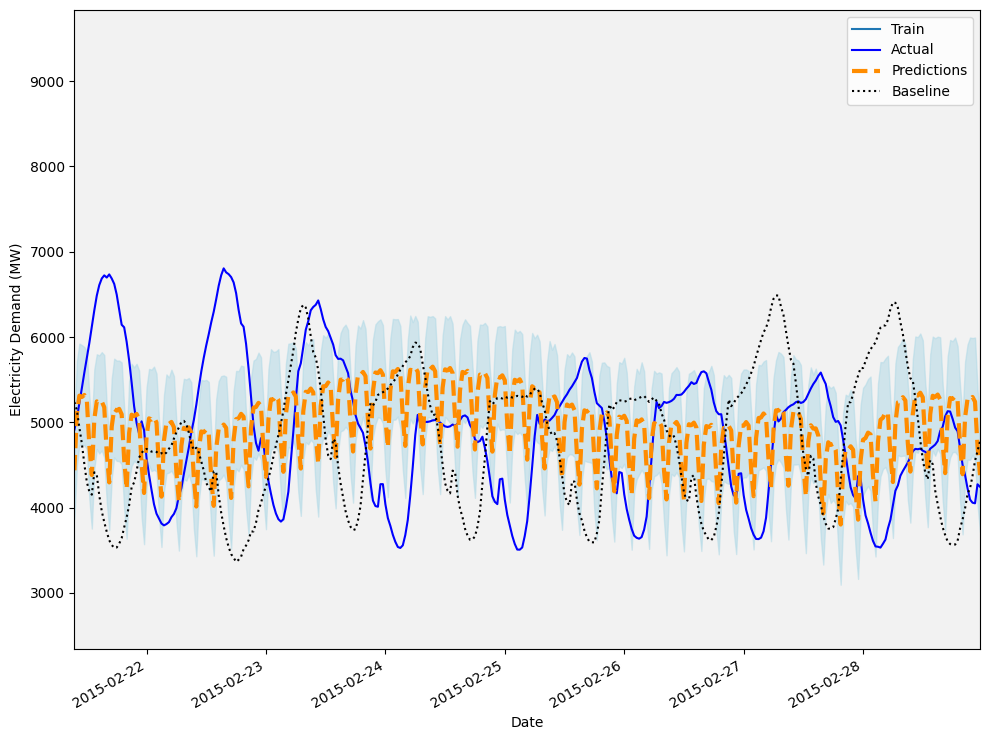

In [201]:
fig, ax = plt.subplots()

ax.plot(train_electricity['ds'], train_electricity['y'], label='Train')
ax.plot(test_electricity['ds'], test_electricity['y'], 'b-', label='Actual')
ax.plot(test_electricity['ds'], test_electricity['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test_electricity['ds'], test_electricity['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Electricity Demand (MW)')

# Highlight forecast period
ax.axvspan(test_electricity['ds'].iloc[0], test_electricity['ds'].iloc[-1], color='#808080', alpha=0.1)
ax.legend(loc='best')

plt.fill_between(test_electricity['ds'], test_electricity['yhat_lower'], test_electricity['yhat_upper'], color='lightblue', alpha=0.5)

# Here is the zoom:
plt.xlim(test_electricity['ds'].iloc[0], test_electricity['ds'].iloc[-1])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

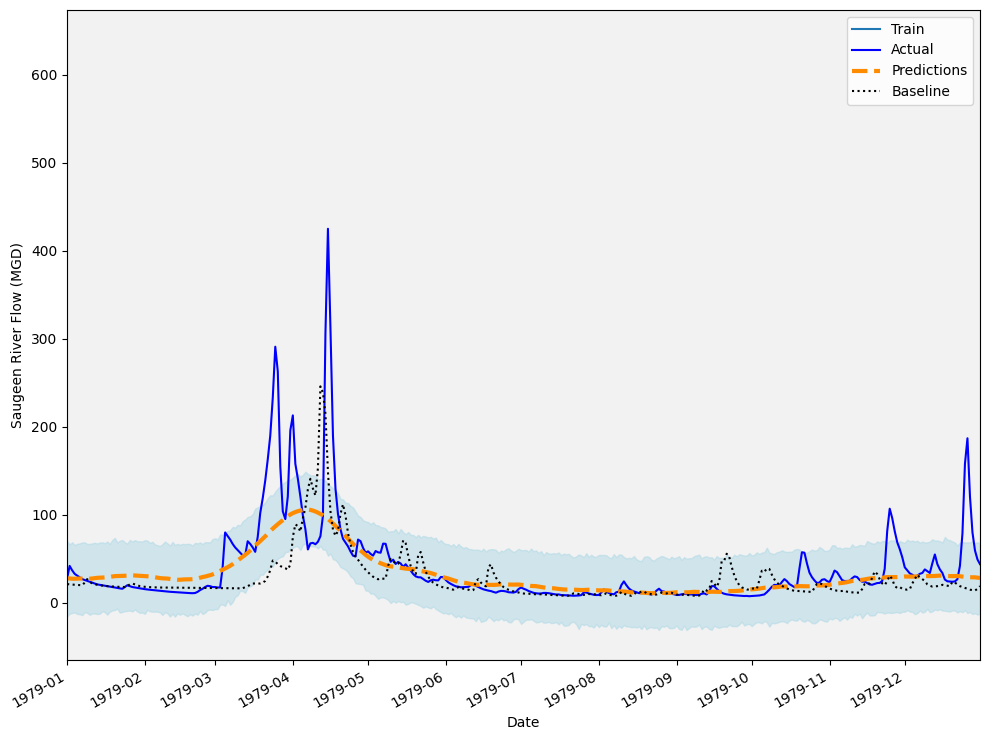

In [202]:
fig, ax = plt.subplots()

ax.plot(train_saugeen['ds'], train_saugeen['y'], label='Train')
ax.plot(test_saugeen['ds'], test_saugeen['y'], 'b-', label='Actual')
ax.plot(test_saugeen['ds'], test_saugeen['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test_saugeen['ds'], test_saugeen['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Saugeen River Flow (MGD)')

# Highlight forecast period
ax.axvspan(test_saugeen['ds'].iloc[0], test_saugeen['ds'].iloc[-1], color='#808080', alpha=0.1)
ax.legend(loc='best')

plt.fill_between(test_saugeen['ds'], test_saugeen['yhat_lower'], test_saugeen['yhat_upper'], color='lightblue', alpha=0.5)

# Here is the zoom:
plt.xlim(test_saugeen['ds'].iloc[0], test_saugeen['ds'].iloc[-1])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

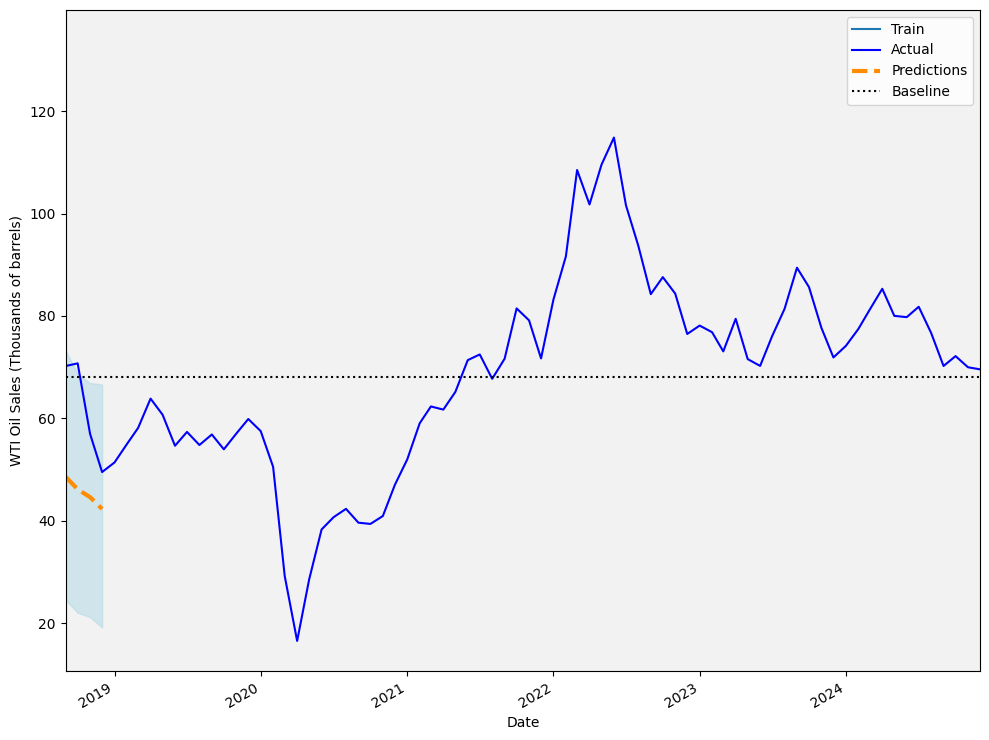

In [205]:
fig, ax = plt.subplots()

ax.plot(train_wti['ds'], train_wti['y'], label='Train')
ax.plot(test_wti['ds'], test_wti['y'], 'b-', label='Actual')
ax.plot(test_wti['ds'], test_wti['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test_wti['ds'], test_wti['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('WTI Oil Sales (Thousands of barrels)')

# Highlight forecast period
ax.axvspan(test_wti['ds'].iloc[0], test_wti['ds'].iloc[-1], color='#808080', alpha=0.1)
ax.legend(loc='best')

plt.fill_between(test_wti['ds'], test_wti['yhat_lower'], test_wti['yhat_upper'], color='lightblue', alpha=0.5)

# Here is the zoom:
plt.xlim(test_wti['ds'].iloc[0], test_wti['ds'].iloc[-1])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

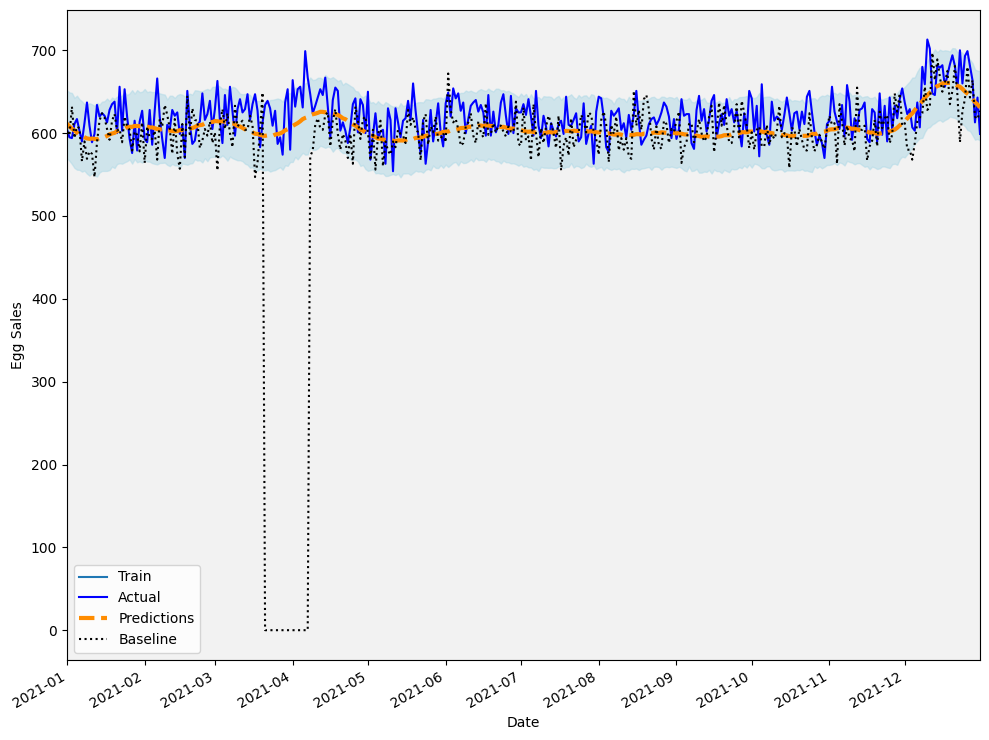

In [206]:
fig, ax = plt.subplots()

ax.plot(train_egg_sales['ds'], train_egg_sales['y'], label='Train')
ax.plot(test_egg_sales['ds'], test_egg_sales['y'], 'b-', label='Actual')
ax.plot(test_egg_sales['ds'], test_egg_sales['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test_egg_sales['ds'], test_egg_sales['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Egg Sales')

# Highlight forecast period
ax.axvspan(test_egg_sales['ds'].iloc[0], test_egg_sales['ds'].iloc[-1], color='#808080', alpha=0.1)
ax.legend(loc='best')

plt.fill_between(test_egg_sales['ds'], test_egg_sales['yhat_lower'], test_egg_sales['yhat_upper'], color='lightblue', alpha=0.5)

# Here is the zoom:
plt.xlim(test_egg_sales['ds'].iloc[0], test_egg_sales['ds'].iloc[-1])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

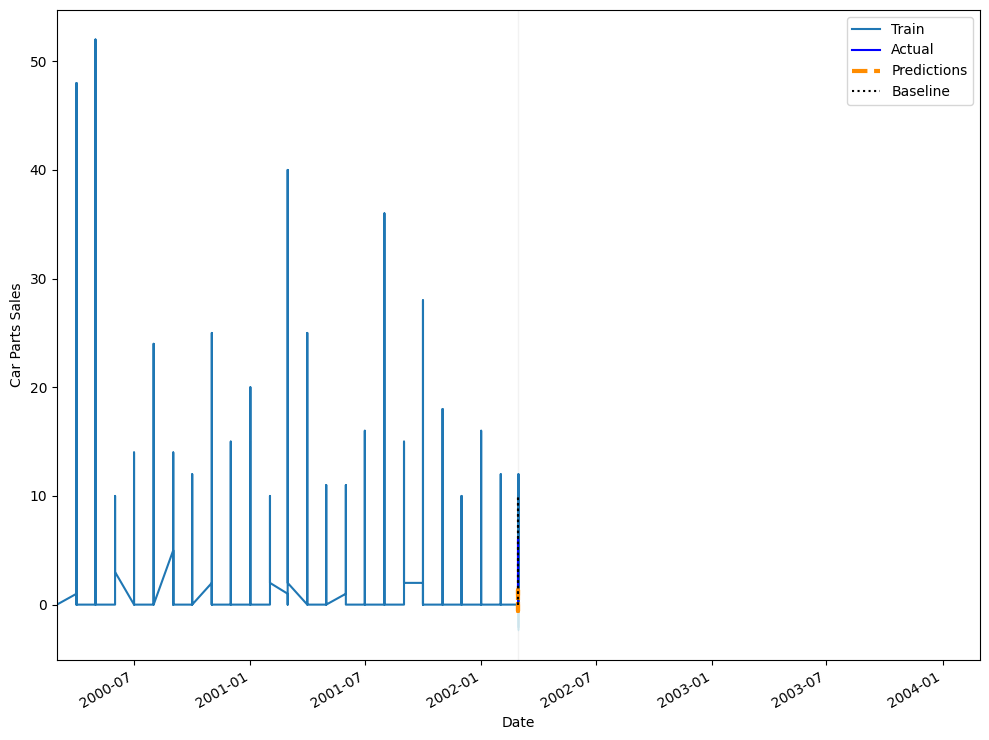

In [210]:
fig, ax = plt.subplots()

ax.plot(train_car_parts['ds'], train_car_parts['y'], label='Train')
ax.plot(test_car_parts['ds'], test_car_parts['y'], 'b-', label='Actual')
ax.plot(test_car_parts['ds'], test_car_parts['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test_car_parts['ds'], test_car_parts['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Car Parts Sales')

# Highlight forecast period
ax.axvspan(test_car_parts['ds'].iloc[0], test_car_parts['ds'].iloc[-1], color='#808080', alpha=0.1)
ax.legend(loc='best')

plt.fill_between(test_car_parts['ds'], test_car_parts['yhat_lower'], test_car_parts['yhat_upper'], color='lightblue', alpha=0.5)

# Here is the zoom:
plt.xlim(test_car_parts['ds'].iloc[0], test_car_parts['ds'].iloc[-1])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()